### Desafío de Negocio:
Ante la creciente necesidad de detectar fraudes en transacciones móviles de dinero, los bancos están en la búsqueda de soluciones innovadoras. Como científicos de datos, se nos ha encargado desarrollar un modelo de machine learning que identifique con precisión las transacciones legítimas y fraudulentas, estableciendo un nuevo estándar de seguridad en el sector financiero móvil a nivel global.

### Tareas Principales:

**Preprocesamiento de Datos:** Llevar a cabo la limpieza de datos, gestionar valores faltantes, codificar variables categóricas, y normalizar o escalar los datos según sea necesario.

**Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables clave, y realizar visualizaciones para entender las relaciones entre variables y seleccionar las características más relevantes.

**Construcción de Modelos:** Experimentar con diversos algoritmos de machine learning, como la Regresión Logística y Random Forest.  

**Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC y F1-score. Seleccionar el modelo con el mejor rendimiento para detectar transacciones fraudulentas en el ámbito bancario.

### 1. Carga de librerias

In [1]:
#Librerias basicas
import pandas as pd
import numpy as np
import time

#Librerias de visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter


#Librerias de ML
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.under_sampling import RandomUnderSampler 
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

#Librerias de Metricas 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
#Libreria para guardar y cargar nuestros modelos
from joblib import dump
from joblib import load

import warnings
warnings.filterwarnings("ignore")

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### 2. Preprocesamiento de Datos

In [2]:
file_path = 'data_transacciones.csv'
df_transacciones = pd.read_csv(file_path)
df_transacciones.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df_transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Vemos que hay mas de 6 millones de filas. 
Este es un ejemplo de 1 fila con explicación de encabezados:  

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0
------------------------------------------------------------------------------------------
**step**: asigna una unidad de tiempo en el mundo real. En este caso, 1 paso equivale a 1 hora de tiempo. Total de pasos: 744 (simulación de 30 días).

**type:** CASH-IN, CASH-OUT, DEBIT, PAYMENT y TRANSFER.

**mount:**
monto de la transacción en moneda local.

**nameOrig:** cliente que inició la transacción

**oldbalanceOrg:** saldo inicial antes de la transacción

**newbalanceOrig:** nuevo saldo después de la transacción.

**nameDest:** cliente que es el destinatario de la transacción

**oldbalanceDest:** destinatario del saldo inicial antes de la transacción. Tenga en cuenta que no hay información para los clientes que comienzan con M (comerciantes).

**newbalanceDest:** destinatario del nuevo saldo después de la transacción. Tenga en cuenta que no hay información para los clientes que comienzan con M (comerciantes).

**isFraud:** se trata de las transacciones realizadas por los agentes fraudulentos dentro de la simulación. En este conjunto de datos específico, el comportamiento fraudulento de los agentes tiene como objetivo obtener ganancias tomando el control de las cuentas de los clientes e intentar vaciar los fondos transfiriéndolos a otra cuenta y luego sacándolos del sistema.

**isFlaggedFraud:** el modelo comercial tiene como objetivo controlar las transferencias masivas de una cuenta a otra y marca los intentos ilegales. Un intento ilegal en este conjunto de datos es un intento de transferir más de 200.000 en una sola transacción.

### Creamos una función para procesar los datos exportados según las actividades que queremos hacer

In [4]:
#Función Procesar Datos
def procesar_datos():
  global df_transacciones

  #Crear Variables
  df_transacciones['type2'] = df_transacciones['nameOrig'].str[0] + df_transacciones['nameDest'].str[0]

  #One Hot Encoding, Añadir Columnas al Dataframe
  df_transacciones = pd.get_dummies(df_transacciones, columns=['type', 'type2'], dtype=np.int64)

  #Feature engineering de variable step por día y hora
  df_transacciones['day'] = (df_transacciones['step'] // 24) + 1
  df_transacciones['hour'] = (df_transacciones['step'] % 24) + 1

  #Eliminar Columnas Seleccionadas
  columnas = ['nameOrig', 'nameDest', 'isFlaggedFraud', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'step']
  df_transacciones.drop(columnas, axis=1, inplace=True)

  #Eliminar Duplicados y Nulos
  df_transacciones.drop_duplicates(inplace=True)
  df_transacciones.dropna(inplace=True)
     

In [5]:
#Llamar función y examinar dataframe

procesar_datos()

df_transacciones.head()   

,amount,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type2_CC,type2_CM,day,hour
0,9839.64,0,0,0,0,1,0,0,1,1,2
1,1864.28,0,0,0,0,1,0,0,1,1,2
2,181.00,1,0,0,0,0,1,1,0,1,2
3,181.00,1,0,1,0,0,0,1,0,1,2
4,11668.14,0,0,0,0,1,0,0,1,1,2


In [6]:
df_transacciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6355023 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   amount         float64
 1   isFraud        int64  
 2   type_CASH_IN   int64  
 3   type_CASH_OUT  int64  
 4   type_DEBIT     int64  
 5   type_PAYMENT   int64  
 6   type_TRANSFER  int64  
 7   type2_CC       int64  
 8   type2_CM       int64  
 9   day            int64  
 10  hour           int64  
dtypes: float64(1), int64(10)
memory usage: 581.8 MB


Se elimina columnas que se considera irrelevantes y se separo las columnas según el tipo de transacción y el tipo de destinatario.

## 3. Exploración de Datos

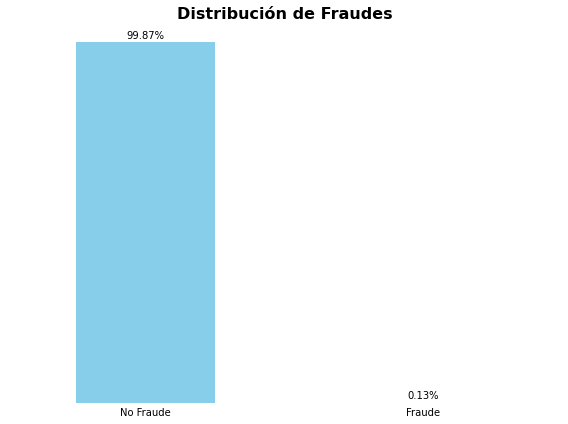

In [7]:
conteo = df_transacciones['isFraud'].value_counts()

#Crear el gráfico
plt.figure(figsize=(8, 6))
ax = conteo.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='none')
plt.title('Distribución de Fraudes', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks([0, 1], ['No Fraude', 'Fraude'], rotation=0)
plt.tick_params(axis='y', which='both', left=False)

#Ocultar línea superior y derecha del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().tick_params(axis='both', which='both', length=0)

#Agregar porcentaje
total = sum(conteo)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 80000, f"{round((i.get_height() / total) * 100, 2)}%", ha='center')

plt.grid(False)
plt.tight_layout()
plt.show()

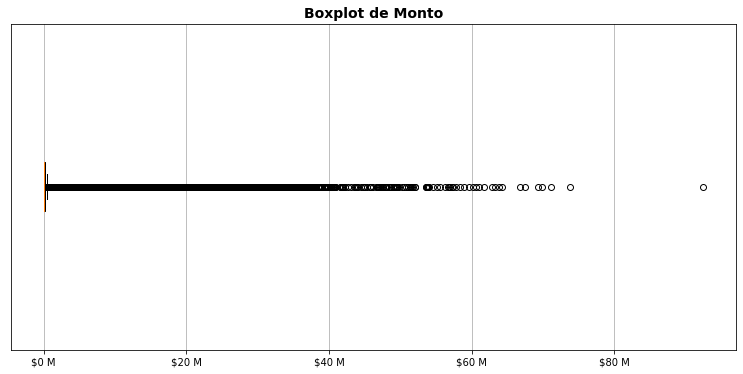

In [8]:
#Crear el boxplot de la variable 'amount'
plt.figure(figsize=(13, 6))
plt.boxplot(df_transacciones['amount'], vert=False)
plt.title('Boxplot de Monto', fontsize=14, fontweight='bold')
plt.yticks([])
plt.grid(axis='x')
formatter = ticker.FuncFormatter(lambda x, _: f'${x / 1e6:.0f} M')
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

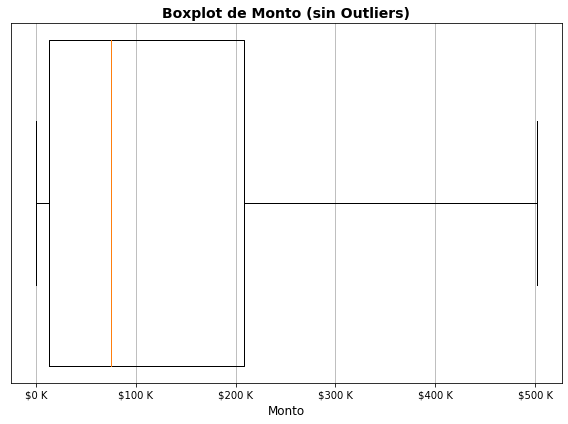

In [9]:
#Crear el boxplot 'amount' snin outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df_transacciones['amount'], vert=False, showfliers=False, widths=10)
plt.title('Boxplot de Monto (sin Outliers)', fontsize=14, fontweight='bold')
plt.xlabel('Monto', fontsize=12)
plt.yticks([])
plt.grid(axis='x')
formatter = ticker.FuncFormatter(lambda x, _: f'${x / 1e3:.0f} K')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

A partir de los gráficos anteriores, se puede concluir lo siguiente:

Hay un gran desbalance en la variable objetivo, por lo que será necesario realizar un balanceo más adelante para mejorar el modelo.
Existen muchos outliers en los montos de las transacciones, pero según el boxplot, la mayor concentración, sin contar los outliers, se encuentra entre 10K y 210K aproximadamente

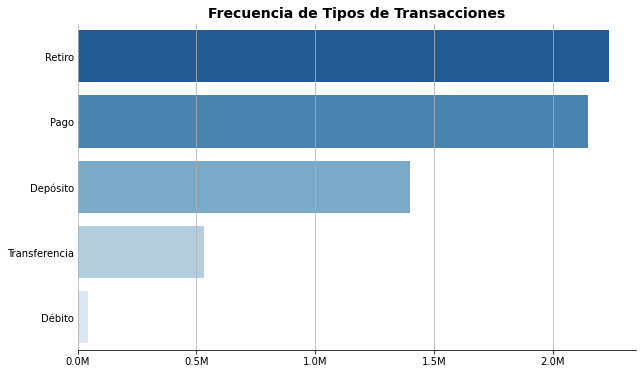

In [10]:
frecuencia_tipos = df_transacciones[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']].sum()

#Ordenar los valores de frecuencia de mayor a menor
frecuencia_tipos_sorted = frecuencia_tipos.sort_values(ascending=False)
plt.figure(figsize=(10, 6))

#Ajustar la paleta de colores para que la barra más grande sea un azul más fuerte
palette = sns.color_palette("Blues_r", len(frecuencia_tipos_sorted))
columnas = ['Retiro', 'Pago', 'Depósito', 'Transferencia', 'Débito']

#Dibujar el gráfico de barras horizontal
sns.barplot(x=frecuencia_tipos_sorted.values, y=columnas, palette=palette)
plt.title('Frecuencia de Tipos de Transacciones', fontsize=14, fontweight='bold')
plt.ylabel('')

#Ajustar el eje x para que muestre los valores en millones
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().xaxis.set_major_formatter(formatter)

#Eliminar los bordes del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Eliminar las marcas y etiquetas del eje y
plt.gca().tick_params(axis='y', length=0)
plt.grid(axis='x')
plt.show()

El gráfico muestra la frecuencia de diferentes tipos de transacciones en un sistema financiero. Los tipos de transacciones se enumeran en el eje vertical, mientras que el eje horizontal representa la cantidad de transacciones en millones.

**Retiro:** Es el tipo de transacción más frecuente, con un poco más de 2 millones de transacciones.  
**Pago:** Tiene una frecuencia ligeramente inferior a los retiros, con casi 2 millones de transacciones.  
**Depósito:** Es el tercer tipo de transacción más común, con alrededor de 1.5 millones de transacciones.  
**Transferencia:** Tiene una menor frecuencia en comparación con los anteriores, con aproximadamente 1 millón de transacciones.  
**Débito:** Es el tipo de transacción menos frecuente, con menos de 0.5 millones de transacciones.  

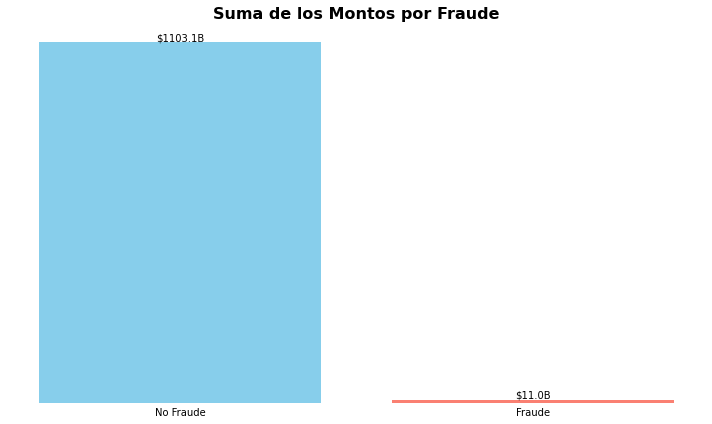

In [11]:
#Calcular la suma de 'amount' por fraude en miles de millones
suma_no_fraude = df_transacciones[df_transacciones['isFraud'] == 0]['amount'].sum() / 1e9
suma_fraude = df_transacciones[df_transacciones['isFraud'] == 1]['amount'].sum() / 1e9

#Crear el histograma
plt.figure(figsize=(10, 6))
barplot = plt.bar(['No Fraude', 'Fraude'], [suma_no_fraude, suma_fraude], color=['skyblue', 'salmon'])
plt.title('Suma de los Montos por Fraude', fontsize=16, fontweight='bold')

#Ocultar los ejes y etiquetas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().tick_params(axis='both', which='both', length=0)

# Agregar el monto
for bar, monto in zip(barplot, [suma_no_fraude, suma_fraude]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'${monto:.1f}B', ha='center', va='bottom')

plt.grid(False)
plt.tight_layout()
plt.show()

El gráfico muestra la suma total de los montos asociados a transacciones clasificadas como fraude y no fraude.  

Interpretación:  

**No Fraude:** La barra azul representa la suma de los montos de transacciones que no son fraude, totalizando $1103.1 mil millones. Esto indica que la mayoría del dinero involucrado en las transacciones no está relacionado con actividades fraudulentas.  

**Fraude:** La barra roja muestra la suma de los montos de las transacciones que han sido identificadas como fraude, sumando $11.0 mil millones. Aunque el monto es significativamente menor comparado con las transacciones no fraudulentas, sigue siendo considerable.  

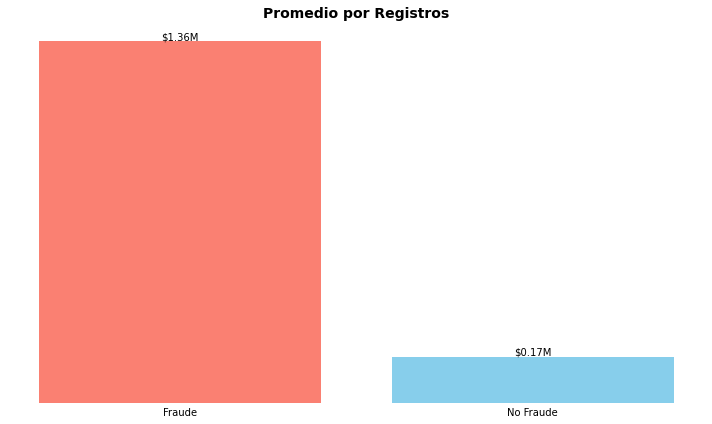

In [12]:
#Calcula la suma de los montos para registros de fraude y no fraude
suma_montos_fraude = df_transacciones[df_transacciones['isFraud'] == 1]['amount'].sum()/1e6
suma_montos_no_fraude = df_transacciones[df_transacciones['isFraud'] == 0]['amount'].sum()/1e6

#Calcula el número de registros de fraude y no fraude
registros_fraude = df_transacciones['isFraud'].sum()
registros_no_fraude = len(df_transacciones) - registros_fraude

#Calcula el promedio por registros
razon_fraude = suma_montos_fraude / registros_fraude
razon_no_fraude = suma_montos_no_fraude / registros_no_fraude

#Grafica la razón entre la suma de montos y el número de registros para fraude y no fraude
plt.figure(figsize=(10, 6))
barplot = plt.bar(['Fraude', 'No Fraude'], [razon_fraude, razon_no_fraude], color=['salmon', 'skyblue'])
plt.title('Promedio por Registros', fontsize=14, fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)


#Agrega etiquetas con el número encima de cada barra
for barra in barplot:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, f'${altura:.2f}M', ha='center', va='bottom')

plt.gca().axes.yaxis.set_ticklabels([])
plt.grid(False)
plt.tight_layout()
plt.show()

El gráfico compara el promedio de montos por registro entre las transacciones fraudulentas y las no fraudulentas.  

Interpretación:  

**Fraude:** La barra roja indica que el promedio de montos por registro en las transacciones fraudulentas es de $1.36 millones. Esto sugiere que cuando ocurre un fraude, los montos involucrados tienden a ser significativamente altos.

**No Fraude:** La barra azul muestra que el promedio de montos por registro en las transacciones no fraudulentas es de $0.17 millones. Este promedio es considerablemente menor en comparación con las transacciones fraudulentas.

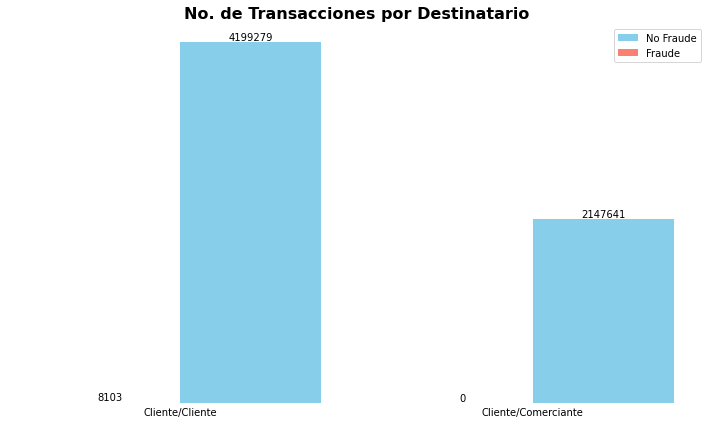

In [13]:
#Calcular el no. total de transacciones fraudulentas y no fraudulentas por tipo de destinatario
recuento_por_tipo_fraude = df_transacciones[df_transacciones['isFraud'] == 1][['type2_CC', 'type2_CM']].sum()
recuento_por_tipo_no_fraude = df_transacciones[df_transacciones['isFraud'] == 0][['type2_CC', 'type2_CM']].sum()
plt.figure(figsize=(10, 6))

#Graficar barras para transacciones fraudulentas y no fraudulentas
bar_width = 0.4
bar_index = np.arange(len(recuento_por_tipo_fraude))

plt.bar(bar_index + bar_width/2, recuento_por_tipo_no_fraude, bar_width, label='No Fraude', color='skyblue')
plt.bar(bar_index - bar_width/2, recuento_por_tipo_fraude, bar_width, label='Fraude', color='salmon')

plt.title('No. de Transacciones por Destinatario', fontsize=16, fontweight='bold')
nombres_xticks = ['Cliente/Cliente', 'Cliente/Comerciante']
plt.xticks(bar_index, nombres_xticks)
plt.legend()

#Agregar etiquetas con el número de transacciones encima de cada barra
for i, valor in enumerate(recuento_por_tipo_fraude):
    plt.text(i - bar_width/2, valor + 3, str(valor), ha='center', va='bottom')

for i, valor in enumerate(recuento_por_tipo_no_fraude):
    plt.text(i + bar_width/2, valor + 3, str(valor), ha='center', va='bottom')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().tick_params(axis='both', which='both', length=0)
plt.grid(False)
plt.tight_layout()
plt.show()

**Cliente/Cliente:**
“No Fraude”: 4,199,279 transacciones (representadas en azul).  
“Fraude”: 8,103 transacciones (representadas en rojo).  
**Cliente/Comerciante:**  
“No Fraude”: 2,147,641 transacciones (representadas en azul).  
No hay transacciones de “Fraude” en esta categoría.  
Este gráfico visualiza la cantidad de transacciones según el destinatario y si fueron fraudulentas o no.  

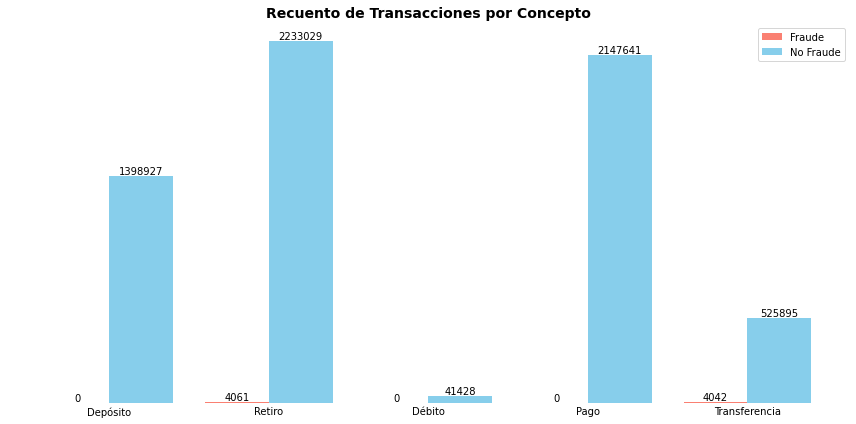

In [14]:
#Calcular el no. total de transacciones por tipo para transacciones fraudulentas y no fraudulentas
recuento_total_fraude_por_tipo = df_transacciones[df_transacciones['isFraud'] == 1][['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']].sum()
recuento_total_no_fraude_por_tipo = df_transacciones[df_transacciones['isFraud'] == 0][['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']].sum()

#Crear el gráfico de barras
plt.figure(figsize=(12, 6))

#Graficar barras para transacciones fraudulentas y no fraudulentas
bar_width = 0.4
bar_index = np.arange(len(recuento_total_fraude_por_tipo))

plt.bar(bar_index - bar_width/2, recuento_total_fraude_por_tipo, bar_width, label='Fraude', color='salmon')
plt.bar(bar_index + bar_width/2, recuento_total_no_fraude_por_tipo, bar_width, label='No Fraude', color='skyblue')

plt.title('Recuento de Transacciones por Concepto', fontsize=14, fontweight='bold')
nuevas_etiquetas = ['Depósito', 'Retiro', 'Débito', 'Pago', 'Transferencia']
plt.xticks(bar_index, nuevas_etiquetas, rotation=0)

plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().tick_params(axis='both', which='both', length=0)

#Agregar etiquetas con el número de transacciones encima de cada barra
for i in range(len(bar_index)):
    plt.text(bar_index[i] - bar_width/2, recuento_total_fraude_por_tipo[i] + 5, str(recuento_total_fraude_por_tipo[i]), ha='center', va='bottom')
    plt.text(bar_index[i] + bar_width/2, recuento_total_no_fraude_por_tipo[i] + 5, str(recuento_total_no_fraude_por_tipo[i]), ha='center', va='bottom')

plt.grid(False)
plt.tight_layout()
plt.show()

Hay cinco pares de barras, cada uno representando un concepto de transacción diferente: Depósito, Retiro, Débito, Pago y Transferencia. Cada par consta de dos barras una al lado de la otra: una para Fraude (en rojo) y otra para No fraude (en azul).  
Aquí están los detalles:  

**Depósito:**  
Fraude: 2,233,029 transacciones.  
No fraude: 2,147,641 transacciones.  
**Retiro:**  
Fraude: 525,895 transacciones.  
No fraude: 414,28 transacciones.  
**Débito:**  
Fraude: 0 transacciones.  
No fraude: 4,061 transacciones.  
**Pago:**  
Fraude: 0 transacciones.  
No fraude: 4,042 transacciones.  
**Transferencia:**  
Fraude: 0 transacciones.  
No fraude: 4,061 transacciones.  

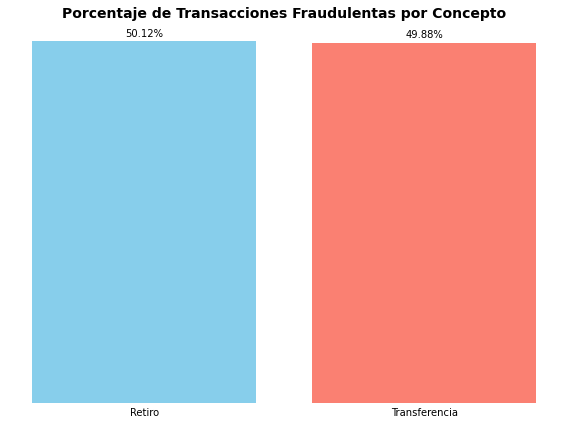

In [15]:
#Calcular el no. total de transacciones fraudulentas por tipo
recuento_total_fraude_por_tipo = df_transacciones[df_transacciones['isFraud'] == 1][['type_CASH_OUT', 'type_TRANSFER']].sum()

#Calcular el total de transacciones fraudulentas
total_fraude = recuento_total_fraude_por_tipo.sum()

#Calcular los porcentajes de transacciones fraudulentas que son CASH_OUT y TRANSFER
porcentaje_cash_out = (recuento_total_fraude_por_tipo['type_CASH_OUT'] / total_fraude) * 100
porcentaje_transfer = (recuento_total_fraude_por_tipo['type_TRANSFER'] / total_fraude) * 100

fig, ax = plt.subplots(figsize=(8, 6))

x = ['Retiro', 'Transferencia']
x_pos = range(len(x))

#Graficar las barras
ax.bar(x_pos, [porcentaje_cash_out, porcentaje_transfer], color=['skyblue', 'salmon'])

#Agregar etiquetas de porcentaje en cada barra
for i, v in enumerate([porcentaje_cash_out, porcentaje_transfer]):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')

ax.set_xticks(x_pos)
ax.set_xticklabels(x)

ax.set_title('Porcentaje de Transacciones Fraudulentas por Concepto', fontsize=14, fontweight='bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().tick_params(axis='both', which='both', length=0)
plt.tight_layout()
plt.show()

Los resultados indican que el porcentaje de transacciones fraudulentas está casi equilibrado entre ambos conceptos, con una ligera mayor incidencia en "Retiros" (50.12%) comparado con "Transferencias" (49.88%).  

Este equilibrio sugiere que tanto los retiros como las transferencias tienen un riesgo similar de fraude, lo que podría implicar que las medidas de seguridad deben ser igualmente rigurosas para ambos tipos de transacciones.  

In [16]:
#Verificación de información
no_fraude, fraude = df_transacciones['isFraud'].value_counts()
print(f'Los registros NO fraudulentos son: {no_fraude}\nLos registros fraudulentos son: {fraude}')

Los registros NO fraudulentos son: 6346920
Los registros fraudulentos son: 8103


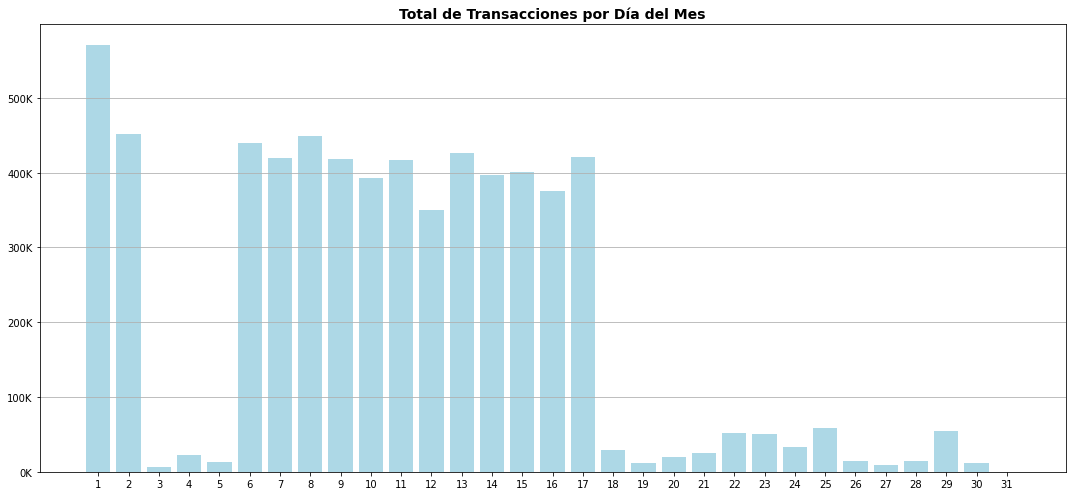

In [17]:

#Calculamos el número total de transacciones por día
transacciones_dia = df_transacciones.groupby('day').size()

#Graficamos la distribución de transacciones por día
plt.figure(figsize=(15, 7))
plt.bar(transacciones_dia.index, transacciones_dia.values / 1e3, color='lightblue')

#Formatear el eje Y en miles
formatter = FuncFormatter(lambda x, _: '{:,.0f}K'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('')
plt.ylabel('')
plt.title('Total de Transacciones por Día del Mes', fontsize=14, fontweight='bold')
plt.grid(axis='y')
plt.tight_layout()
plt.xticks(range(1, 32))
plt.show()

Una gran cantidad de transacciones ocurren los primeros días del mes, se puede deber a que a la mayoría de las personas perciben su salario mensualmente y deciden hacer transacciones.  
También existe una gran concentración de transacciones entre los días 6-17 del mes, algunas perconas podrían recibir sus ingresos cada quince días o semanalmente.  
Es muy común que para los días finales del mes, las personas hayan terminado con gran parte de su dinero, lo que explicaría las pocas transacciones entre los días 18-31.  

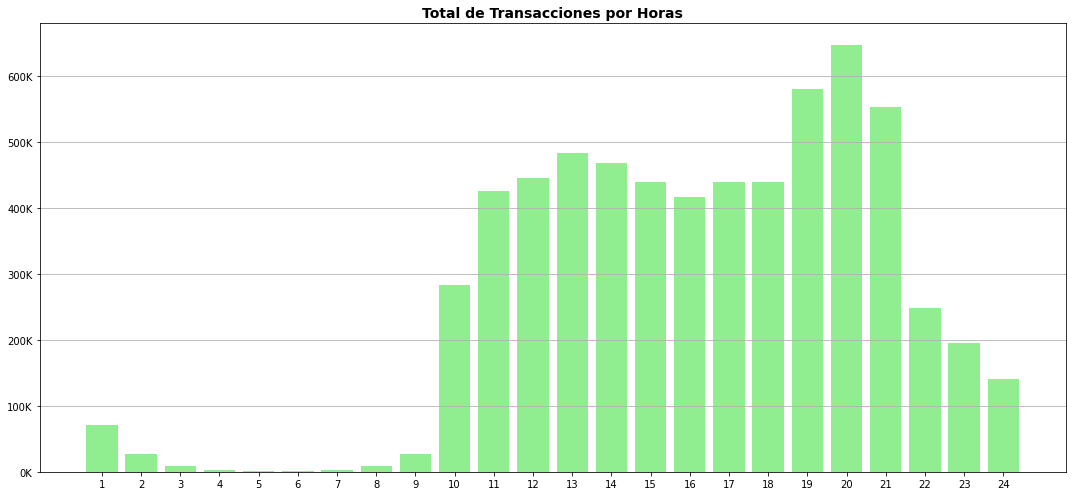

In [18]:
#Calculamos el número total de transacciones por hora
transacciones_hora = df_transacciones.groupby('hour').size()

#Graficamos la distribución de transacciones por día
plt.figure(figsize=(15, 7))
plt.bar(transacciones_hora.index, transacciones_hora.values / 1e3, color='lightgreen')

#Formatear el eje Y en miles
formatter = FuncFormatter(lambda x, _: '{:,.0f}K'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('')
plt.ylabel('')
plt.title('Total de Transacciones por Horas', fontsize=14, fontweight='bold')
plt.grid(axis='y')
plt.tight_layout()
plt.xticks(range(1, 25))
plt.show()

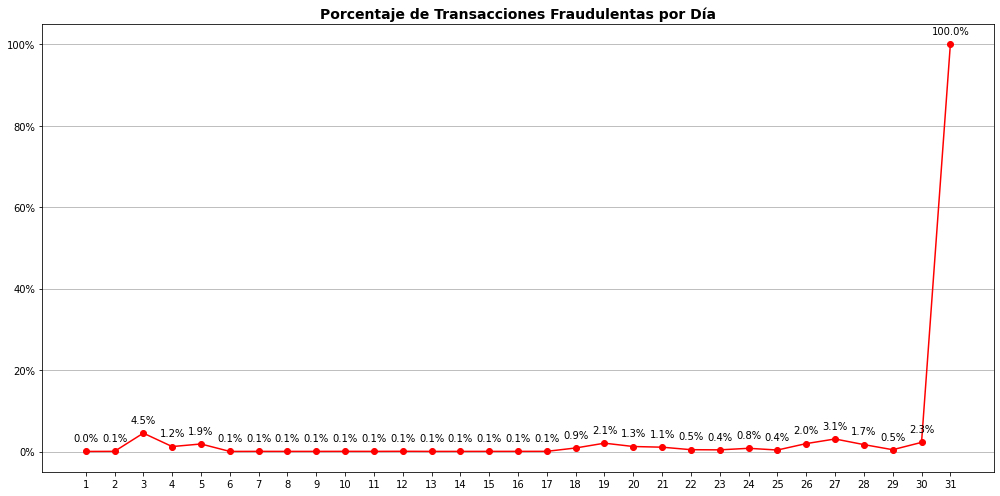

In [19]:
#Calculamos el número de transacciones fraudulentas por día
fraudulent_transactions_per_day = df_transacciones[df_transacciones['isFraud'] == 1].groupby('day').size()

#Calculamos el número total de transacciones por día
total_transactions_per_day = df_transacciones.groupby('day').size()

#Calculamos la proporción de transacciones fraudulentas por día
fraud_ratio_per_day = fraudulent_transactions_per_day / total_transactions_per_day * 100

plt.figure(figsize=(14, 7))
ax = fraud_ratio_per_day.plot(kind='line', marker='o', color='red')

# Añadir etiquetas con el porcentaje encima de cada punto cuando es mayor a cero
for x, y in zip(fraud_ratio_per_day.index, fraud_ratio_per_day):
    if y > 0:
        ax.annotate(f'{y:.1f}%',
                    (x, y),
                    textcoords="offset points",
                    xytext=(0, 10),
                    ha='center')

plt.xlabel('')
plt.ylabel('')
plt.title('Porcentaje de Transacciones Fraudulentas por Día', fontsize=14, fontweight='bold')
plt.xticks(range(1, 32))
plt.grid(axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}%'.format(x)))
plt.tight_layout()
plt.show()

**Bajo porcentaje general:** Durante la mayor parte del mes, el porcentaje de transacciones fraudulentas es muy bajo, lo que sugiere que el sistema de seguridad o las medidas preventivas han sido efectivas en esos días.  

**Picos de fraude:** Hay algunos días con picos aislados (por ejemplo, 4.5%), lo que podría indicar eventos específicos que llevaron a un aumento temporal en el fraude. Estos días podrían requerir un análisis más profundo para identificar patrones o vulnerabilidades específicas.  

**Día con 100% de fraude:** El día final con un 100% de transacciones fraudulentas es extremadamente inusual y alarmante. Esto podría indicar un fallo grave en la seguridad del sistema, un ataque dirigido, o un error en los datos. Este día debe ser investigado de manera prioritaria para entender las causas subyacentes y prevenir futuros incidentes similares.  

In [20]:
df_transacciones[df_transacciones['day']==31]['isFraud'].value_counts()

isFraud
1    268
Name: count, dtype: int64

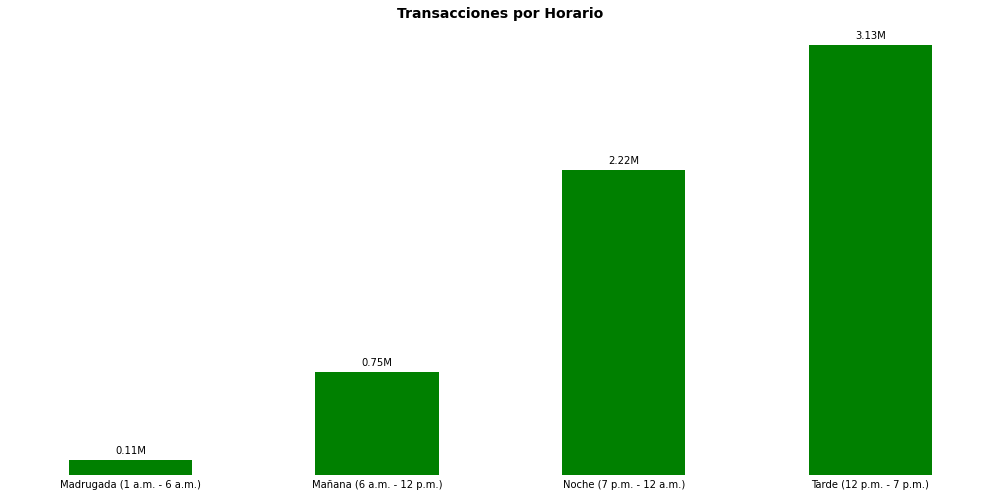

In [21]:
ranges = {
    'Madrugada (1 a.m. - 6 a.m.)': (1, 6),
    'Mañana (6 a.m. - 12 p.m.)': (6, 12),
    'Tarde (12 p.m. - 7 p.m.)': (12, 19),
    'Noche (7 p.m. - 12 a.m.)': (19, 24)
}

#Función para asignar cada hora a su rango correspondiente
def categorize_hour(hour):
    for label, (start, end) in ranges.items():
        if start <= hour < end:
            return label
    return None

#Aplicamos la función para crear una nueva columna 'hour_range'
df_transacciones['hour_range'] = df_transacciones['hour'].apply(categorize_hour)

#Contamos el número de transacciones por rango horario
transactions_per_hour_range = df_transacciones.groupby('hour_range').size()

#Graficamos la distribución de transacciones por rango horario
plt.figure(figsize=(14, 7))
ax = transactions_per_hour_range.plot(kind='bar', color='green')

#Añadir etiquetas con los valores en millones encima de cada barra
for p in ax.patches:
    value_in_millions = p.get_height() / 1e6
    ax.annotate(f'{value_in_millions:.2f}M',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.title('Transacciones por Horario', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().tick_params(axis='both', which='both', length=0)
plt.tight_layout()
plt.grid(False)
plt.tight_layout()
plt.show()

Se realizan más transferencias en las tardes y noches que en la mañana y madrugada. Esto es lógico, ya que es cuando las personas no están en la escuela o en el trabajo.  
El último día del mes hubo 268 transacciones, todas ellas fraudulentas.  

In [22]:
df_transacciones.drop(columns='hour_range',inplace=True)

### Mapa de correlaciones

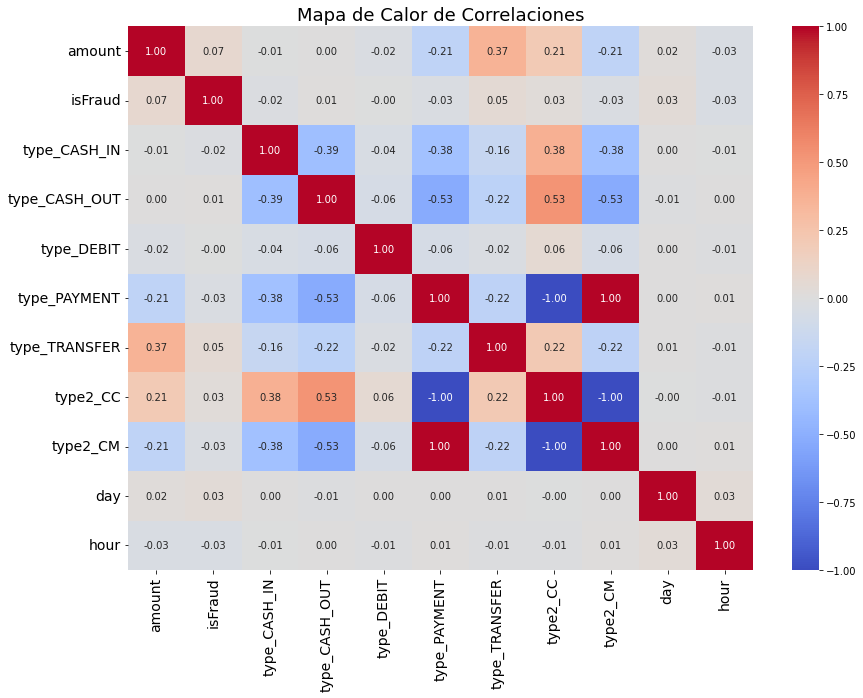

In [23]:
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(df_transacciones.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

La escala en el lado derecho indica que el azul representa una correlación de -1, el blanco representa 0 y el rojo representa 1.

**amount:**  
Correlación con isFraud: 0.07  
Correlación con day: 0.02  
Correlación con hour: 0.03  
**isFraud:**  
Correlación con amount: 0.07  
Correlación con day: 0.02  
Correlación con hour: 0.03  
**day:**  
Correlación con amount: 0.02  
Correlación con isFraud: 0.02  
Correlación con hour: 0.01  
**hour:**  
Correlación con amount: 0.03  
Correlación con isFraud: 0.03  
Correlación con day: 0.01  

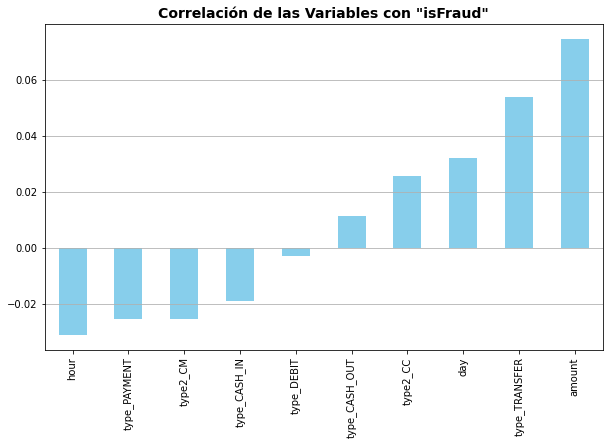

In [24]:
# Correlación de las variables respecto a 'isFraud' excluyendo la correlación con 'isFraud' misma
correlation_series = df_transacciones.corr()['isFraud'].drop('isFraud')

# Graficar la correlación
plt.figure(figsize=(10, 6))
correlation_series.sort_values().plot(kind='bar', color='skyblue')
plt.title('Correlación de las Variables con "isFraud"', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.grid(axis='y')
plt.ylabel('')
plt.show()

Las variables 'amount', 'Transfer' y 'step' son las mas correlacionadas con los fraudes.

**SMOTE:** Aplica la técnica SMOTE para generar datos sintéticos y equilibrar las clases. SMOTE crea nuevas instancias de la clase minoritaria (en este caso, las transacciones fraudulentas) mediante interpolación entre instancias existentes.  

In [25]:
#Función de balanceo de clases
def balanceo_clases():
  global df_transacciones

  #Aplicar SMOTE
  smote = SMOTE()
  X = df_transacciones.drop('isFraud', axis=1)
  y = df_transacciones['isFraud']
  X_resampled, y_resampled = smote.fit_resample(X, y)

  #Crear un nuevo df
  df_banco_balanceado = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['isFraud'])], axis=1)

  #Eliminar duplicados
  df_banco_balanceado.drop_duplicates(inplace=True)

  #Actualizar df
  df_transacciones = df_banco_balanceado
     

In [26]:
balanceo_clases()

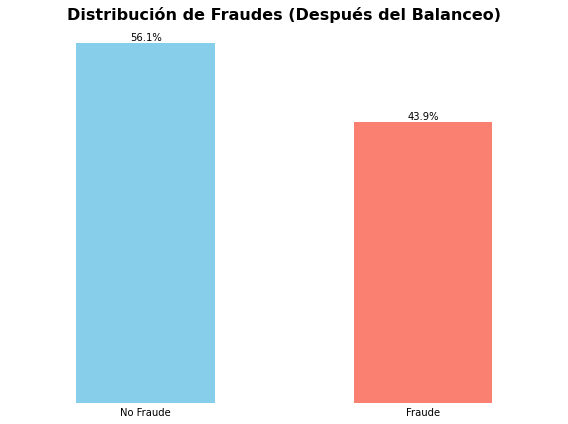

In [27]:
conteo = df_transacciones['isFraud'].value_counts()

#Crear el gráfico
plt.figure(figsize=(8, 6))
ax = conteo.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='none')
plt.title('Distribución de Fraudes (Después del Balanceo)', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks([0, 1], ['No Fraude', 'Fraude'], rotation=0)
plt.tick_params(axis='y', which='both', left=False)

#Ocultar línea superior y derecha del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().tick_params(axis='both', which='both', length=0)

#Agregar porcentaje
total = sum(conteo)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 50000, f"{round((i.get_height() / total) * 100, 2)}%", ha='center')

plt.grid(False)
plt.tight_layout()
plt.show()

Ahora observamos que se redujo la diferencia a solo 13% entre las clases.  

**Creación de un nuevo DataFrame:** Combina los datos sintéticos generados por SMOTE con los datos originales para crear un nuevo DataFrame llamado df_banco_balanceado.  

**Eliminación de duplicados:** Se eliminan las filas duplicadas en el nuevo DataFrame.  
**Actualización del DataFrame original:** El DataFrame original df_transacciones se actualiza con los datos del DataFrame balanceado.  

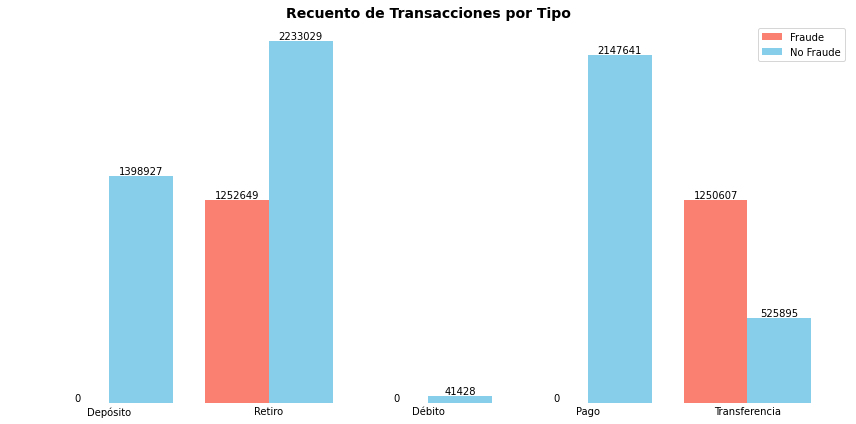

In [28]:
#Calcular el recuento total de transacciones por tipo para transacciones fraudulentas y no fraudulentas
recuento_total_fraude_por_tipo = df_transacciones[df_transacciones['isFraud'] == 1][['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']].sum()
recuento_total_no_fraude_por_tipo = df_transacciones[df_transacciones['isFraud'] == 0][['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']].sum()

#Crear el gráfico de barras
plt.figure(figsize=(12, 6))

#Graficar barras para transacciones fraudulentas y no fraudulentas
bar_width = 0.4
bar_index = np.arange(len(recuento_total_fraude_por_tipo))

plt.bar(bar_index - bar_width/2, recuento_total_fraude_por_tipo, bar_width, label='Fraude', color='salmon')
plt.bar(bar_index + bar_width/2, recuento_total_no_fraude_por_tipo, bar_width, label='No Fraude', color='skyblue')

plt.title('Recuento de Transacciones por Tipo', fontsize=14, fontweight='bold')
nuevas_etiquetas = ['Depósito', 'Retiro', 'Débito', 'Pago', 'Transferencia']  # Lista de nombres personalizados
plt.xticks(bar_index, nuevas_etiquetas, rotation=0)

plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().tick_params(axis='both', which='both', length=0)

#Agregar etiquetas con el número de transacciones encima de cada barra
for i in range(len(bar_index)):
    plt.text(bar_index[i] - bar_width/2, recuento_total_fraude_por_tipo[i] + 5, str(recuento_total_fraude_por_tipo[i]), ha='center', va='bottom')
    plt.text(bar_index[i] + bar_width/2, recuento_total_no_fraude_por_tipo[i] + 5, str(recuento_total_no_fraude_por_tipo[i]), ha='center', va='bottom')


plt.grid(False)
plt.tight_layout()
plt.show()

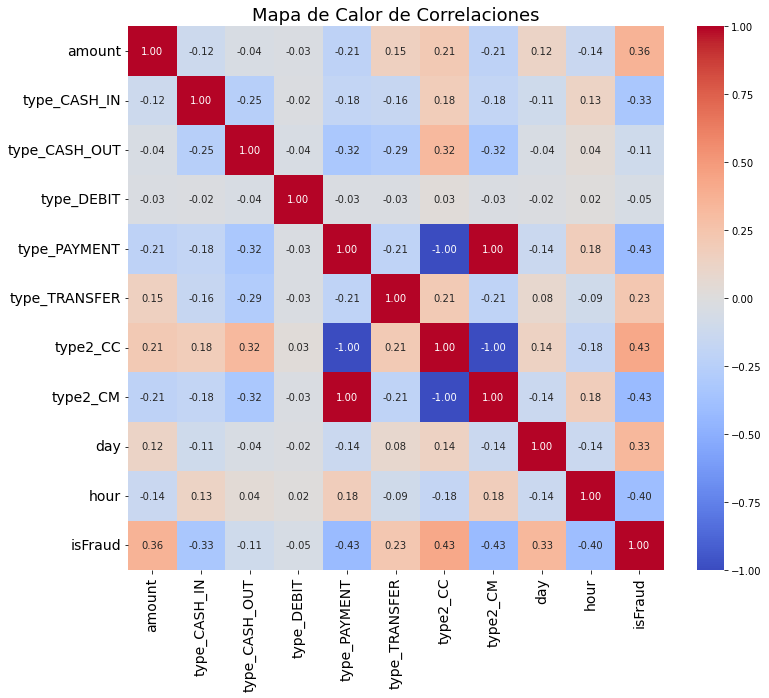

In [29]:
#Mapa de calor balanceado
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df_transacciones.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

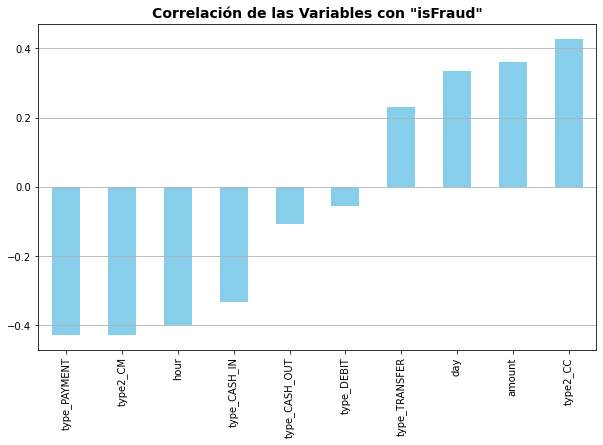

In [30]:
#Correlación de las variables respecto a 'isFraud' excluyendo la correlación con 'isFraud' misma
correlation_series = df_transacciones.corr()['isFraud'].drop('isFraud')

#Graficar la correlación
plt.figure(figsize=(10, 6))
correlation_series.sort_values().plot(kind='bar', color='skyblue')
plt.title('Correlación de las Variables con "isFraud"', fontsize=14,fontweight='bold')
plt.xlabel('')
plt.grid(axis='y')
plt.ylabel('')
plt.show()

In [31]:
#Crear un DataFrame con las variables independientes
X = df_transacciones.drop(columns='isFraud')
#Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

        Variable        VIF
0         amount   1.123764
1   type_CASH_IN   1.546674
2  type_CASH_OUT   1.816082
3     type_DEBIT   1.019041
4   type_PAYMENT        inf
5  type_TRANSFER   1.463306
6       type2_CC  13.586297
7       type2_CM        inf
8            day   1.075602
9           hour   1.110595


**Variables con VIF alto o infinito:**  

type_PAYMENT y type2_CM tienen un VIF de inf (infinito), lo que indica una colinealidad perfecta con otras variables en el modelo.  

type2_CC tiene un VIF muy alto de 13.58, lo que sugiere una fuerte multicolinealidad con otras variables.

**Variables con VIF bajo:**  

Las demás variables (amount, type_CASH_IN, type_CASH_OUT, type_DEBIT, type_TRANSFER, day, hour) tienen VIF menores a 2, lo cual indica que no tienen problemas significativos de multicolinealidad.

**Acciones a tomar:**  

Eliminar o modificar variables con VIF infinito:  

Deberías considerar eliminar type2_CC y type2_CM, o revisar cómo están codificadas estas variables, ya que la colinealidad perfecta puede causar problemas en la estimación de los coeficientes del modelo.

In [32]:
columnas_irrelevantes = ['type2_CM', 'type2_CC']
df_transacciones.drop(columnas_irrelevantes, axis=1, inplace=True)
df_transacciones.head()

,amount,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,day,hour,isFraud
0,9839.64,0,0,0,1,0,1,2,0
1,1864.28,0,0,0,1,0,1,2,0
2,181.00,0,0,0,0,1,1,2,1
3,181.00,0,1,0,0,0,1,2,1
4,11668.14,0,0,0,1,0,1,2,0


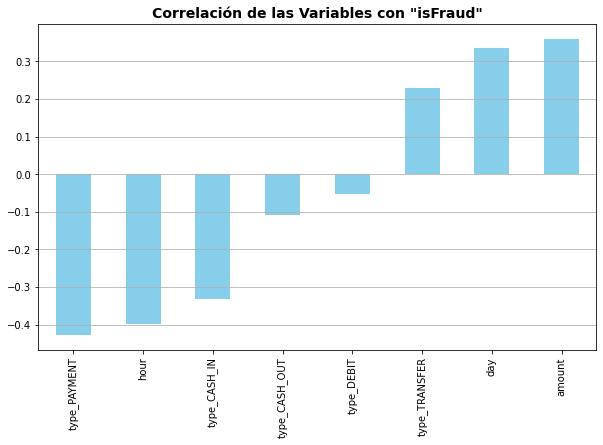

In [33]:
#Correlación de las variables respecto a 'isFraud' excluyendo la correlación con 'isFraud' misma
correlation_series = df_transacciones.corr()['isFraud'].drop('isFraud')
#Graficar la correlación
plt.figure(figsize=(10, 6))
correlation_series.sort_values().plot(kind='bar', color='skyblue')
plt.title('Correlación de las Variables con "isFraud"', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.grid(axis='y')
plt.ylabel('')
plt.show()

In [34]:
X = df_transacciones.drop(columns='isFraud')
#Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

        Variable       VIF
0         amount  1.277977
1   type_CASH_IN  1.593316
2  type_CASH_OUT  2.208992
3     type_DEBIT  1.017088
4   type_PAYMENT  1.947988
5  type_TRANSFER  1.547268
6            day  3.015206
7           hour  5.601671


Hacemos uso de VIF para ver multicolinealidad entre las variables para el modelo, un alto VIF (>10 o >5) indica   multicolinealidad fuerte de alguna de las variables, por lo tanto no removeremos ninguna variable.

### 4. Construcción de Modelos

In [38]:
def entrenar_modelo(nombre, model, X_train, X_test, y_train, y_test):
    start_time = time.time()

    #Entrenamiento
    model.fit(X_train, y_train)

    #Predicciones y métricas en train
    predictions_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, predictions_train)
    prec_train = precision_score(y_train, predictions_train)
    recall_train = recall_score(y_train, predictions_train)
    f1_value_train = f1_score(y_train, predictions_train)
    auc_roc_value_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

    #Predicciones y métricas en test
    predictions_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, predictions_test)
    prec_test = precision_score(y_test, predictions_test)
    recall_test = recall_score(y_test, predictions_test)
    f1_value_test = f1_score(y_test, predictions_test)
    auc_roc_value_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    matriz_test = confusion_matrix(y_test, predictions_test)
    #Determinar si hay sobreajuste
    train_auc = auc_roc_value_train
    test_auc = auc_roc_value_test
    if train_auc - test_auc > 0.1:
        overfit_msg = f"El modelo {nombre} puede estar sobreajustado."
    else:
        overfit_msg = f"El modelo {nombre} no parece estar sobreajustado."
    print(overfit_msg)

    #Obtener importancia de características
    feature_importances = getattr(model, 'feature_importances_', None)

    #Tiempos de modelos
    end_time = time.time()
    duration = end_time - start_time

    print(f"Entrenamiento del modelo {nombre} completado. Tiempo transcurrido: {duration:.0f} segundos.\n")

    return {
        'Nombre_Modelo': nombre,
        'Accuracy_Train': accuracy_train,
        'Precision_Train': prec_train,
        'Recall_Train': recall_train,
        'F1_Score_Train': f1_value_train,
        'AUC_ROC_Train': auc_roc_value_train,
        'Accuracy_Test': accuracy_test,
        'Precision_Test': prec_test,
        'Recall_Test': recall_test,
        'F1_Score_Test': f1_value_test,
        'AUC_ROC_Test': auc_roc_value_test,
        'Feature_Importances': feature_importances,
        'Matriz_Confusión_Test': matriz_test,
        'Sobreajuste': overfit_msg
    }

def crea_modelos(df_banco, modelos):
    #Separar datos
    X = df_banco.drop(columns='isFraud')
    y = df_banco['isFraud']

    #Normalizar datos
    norm = StandardScaler()
    X_normalizado = norm.fit_transform(X)

    #Dividir datos en conjunto de entrenamiento y prueba una vez
    X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.3, random_state=77)

    #Entrenar modelos
    resultados = [entrenar_modelo(nombre, model, X_train, X_test, y_train, y_test) for nombre, model in modelos]

    return resultados

#Definir los modelos
modelos = [
    ('Regresión Logística', LogisticRegression()),
    ('Random Forest', RandomForestClassifier(n_estimators=10, max_depth=15)),
]
     

In [39]:
resultados = crea_modelos(df_transacciones, modelos)

El modelo Regresión Logística no parece estar sobreajustado.
Entrenamiento del modelo Regresión Logística completado. Tiempo transcurrido: 35 segundos.

El modelo Random Forest no parece estar sobreajustado.
Entrenamiento del modelo Random Forest completado. Tiempo transcurrido: 189 segundos.



Las métricas de los datos de entrenamiento y prueba son casi identicos, lo que nos quiere decir que no tenemos un sobreajuste en los modelos.

In [40]:
for result in resultados:
    print(f"Modelo: {result['Nombre_Modelo']}")
    print(f"Accuracy_Train: {round(result['Accuracy_Train']*100, 2)}%")
    print(f"Precisión_Train: {round(result['Precision_Train']*100, 2)}%")
    print(f"Recall_Train: {round(result['Recall_Train']*100, 2)}%")
    print(f"F1_Score_Train: {round(result['F1_Score_Train']*100, 2)}%")
    print(f"AUC-ROC_Train: {round(result['AUC_ROC_Train']*100, 2)}%")
    print(f"\nAccuracy_Test: {round(result['Accuracy_Test']*100, 2)}%")
    print(f"Precisión_Test: {round(result['Precision_Test']*100, 2)}%")
    print(f"Recall_Test: {round(result['Recall_Test']*100, 2)}%")
    print(f"F1_Score_Test: {round(result['F1_Score_Test']*100, 2)}%")
    print(f"AUC-ROC_Test: {round(result['AUC_ROC_Test']*100, 2)}%")
    print('*********************************************************************\n')

Modelo: Regresión Logística
Accuracy_Train: 90.08%
Precisión_Train: 90.68%
Recall_Train: 86.28%
F1_Score_Train: 88.43%
AUC-ROC_Train: 96.78%

Accuracy_Test: 90.11%
Precisión_Test: 90.71%
Recall_Test: 86.32%
F1_Score_Test: 88.46%
AUC-ROC_Test: 96.79%
*********************************************************************

Modelo: Random Forest
Accuracy_Train: 94.56%
Precisión_Train: 96.08%
Recall_Train: 91.35%
F1_Score_Train: 93.65%
AUC-ROC_Train: 98.83%

Accuracy_Test: 94.51%
Precisión_Test: 96.01%
Recall_Test: 91.29%
F1_Score_Test: 93.59%
AUC-ROC_Test: 98.81%
*********************************************************************



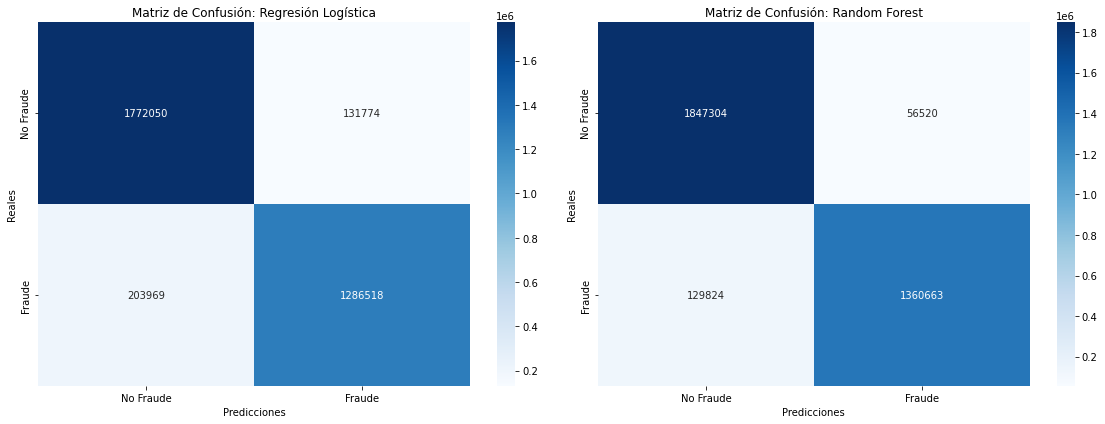

In [41]:
#Graficar la matriz de confusión
for i in range(0, len(resultados), 2):
    plt.figure(figsize=(16, 6))

    for j in range(2):
        if i + j < len(resultados):
            matriz = resultados[i + j]['Matriz_Confusión_Test']
            plt.subplot(1, 2, j + 1)
            sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues")
            plt.title(f"Matriz de Confusión: {resultados[i + j]['Nombre_Modelo']}")
            plt.xlabel("Predicciones")
            plt.ylabel("Reales")
            plt.gca().set_xticklabels(['No Fraude', 'Fraude'])
            plt.gca().set_yticklabels(['No Fraude', 'Fraude'])

    plt.tight_layout()
    plt.show()

## 5. Evaluación y Selección del Modelo

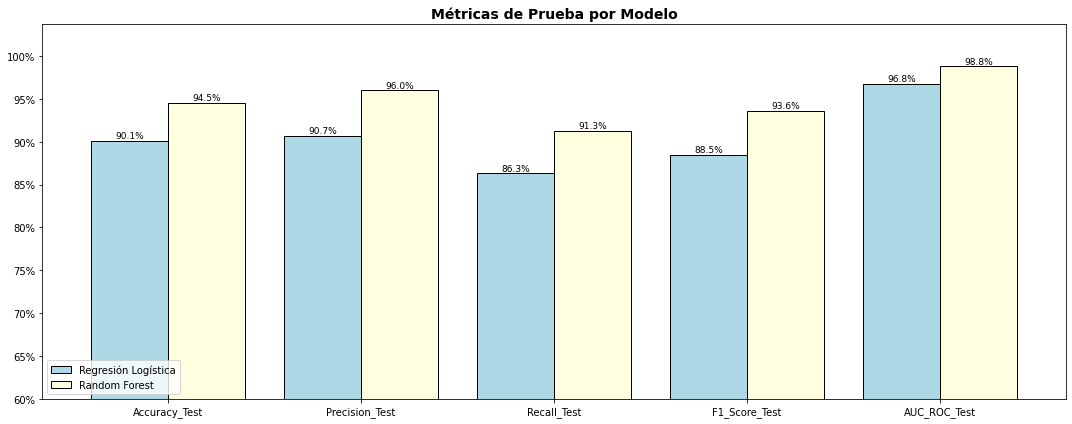

In [42]:
def visualiza_resultados():
    global resultados

    # Transformar resultados a DataFrame
    results_df = pd.DataFrame(resultados)

    # Excluir las últimas dos columnas (matriz de confusión y feature_importances)
    results_df = results_df.iloc[:, :-2]
    results_df.set_index('Nombre_Modelo', inplace=True)

    # Seleccionar solo las métricas de prueba
    results_df = results_df[['Accuracy_Test', 'Precision_Test', 'Recall_Test', 'F1_Score_Test', 'AUC_ROC_Test']]

    # Transponer DataFrame y graficar
    results_df = results_df.T
    colors = ['lightblue', 'lightyellow', 'lightgreen', 'salmon', 'gray']

    ax = results_df.plot(kind='bar', figsize=(15, 6), colormap='viridis', rot=0, color=colors, width=0.8, edgecolor='black')
    plt.title('Métricas de Prueba por Modelo', fontsize=14, fontweight='bold')
    plt.ylim(0.6)

    # Formatear valores del eje Y como porcentajes
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

    # Agregar porcentajes encima de cada barra
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100 * p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.tight_layout()
    plt.grid(False)
    ax.legend(loc='lower left')
    plt.show()

visualiza_resultados()
     

**Accuracy (Exactitud):** 

Random Forest: 94.5%  
Regresión Logística: 90.1%  
El modelo de Random Forest muestra una mejor exactitud en comparación con la Regresión Logística, indicando que clasifica correctamente una mayor proporción de observaciones.  

**Precision:**

Random Forest: 96.0%  
Regresión Logística: 90.7%  
El modelo de Random Forest tiene una mayor precisión, lo que significa que es más efectivo para identificar correctamente las transacciones fraudulentas entre las que predice como tales.  

**Recall (Sensibilidad):**

Random Forest: 91.3%  
Regresión Logística: 86.3%  
El modelo de Random Forest tiene un mejor recall, lo que indica que es más efectivo para identificar las transacciones   fraudulentas reales dentro del total de transacciones fraudulentas.  

**F1-Score:**

Random Forest: 93.6%  
Regresión Logística: 88.5%  
El F1-Score, que es una media armónica de la precisión y el recall, también es superior en el modelo de Random Forest, lo que sugiere un mejor equilibrio entre precisión y sensibilidad.  

**AUC-ROC:**

Random Forest: 98.8%  
Regresión Logística: 96.8%  
El modelo de Random Forest muestra un área bajo la curva ROC (AUC-ROC) más alta, lo que indica un mejor rendimiento general en la distinción entre transacciones fraudulentas y no fraudulentas.